### Retail Sales & Profit Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the Datset

In [34]:
df = pd.read_csv('RetailSalesData.csv')
df.head()

,Unnamed: 0,Sales_ID,Product_Category,Sales_Amount,Discount,Sales_Region,Date_of_Sale,Customer_Age,Customer_Gender,Sales_Representative
0,0,efc35a5f-e48c-4803-9f6d-ef32a60e1367,Movies,341.05,45.98,East Dianeport,2024-07-12,69.0,Male,Bruce Rodriguez
1,1,92a86e42-de42-4e0d-89f3-bbb0b7f354bd,Pet Supplies,594.71,29.59,North Linda,2024-05-07,32.0,Other,Patricia Pugh
2,2,1fbbdc48-f405-48f3-8274-750581552d26,Outdoor,351.90,49.78,Lake Josephmouth,2024-05-11,28.0,Other,Kevin Fuentes
3,3,1f329e7a-13f0-4518-9eeb-84815301d64c,Electronics,NaN,NaN,North Martinside,2024-09-02,NaN,NaN,Evelyn Price
4,4,6ef559dc-3e68-4009-9845-4bab54d897c6,Books,795.75,27.21,Michealshire,2024-05-02,21.0,Other,Joseph Chavez


In [35]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   Sales_ID              100000 non-null  object 
 2   Product_Category      100000 non-null  object 
 3   Sales_Amount          90000 non-null   float64
 4   Discount              90000 non-null   float64
 5   Sales_Region          100000 non-null  object 
 6   Date_of_Sale          100000 non-null  object 
 7   Customer_Age          90000 non-null   float64
 8   Customer_Gender       90000 non-null   object 
 9   Sales_Representative  100000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


## Data Cleaning 

In [36]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [37]:
df['Date_of_Sale'] = pd.to_datetime(df['Date_of_Sale'])

In [38]:
df.isnull().sum()

Sales_ID                    0
Product_Category            0
Sales_Amount            10000
Discount                10000
Sales_Region                0
Date_of_Sale                0
Customer_Age            10000
Customer_Gender         10000
Sales_Representative        0
dtype: int64

In [39]:
df.shape

(100000, 9)

In [40]:
df.dropna(subset=['Sales_Amount', 'Discount', 'Customer_Age', 'Customer_Gender'], inplace=True)

In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.isnull().sum()

Sales_ID                0
Product_Category        0
Sales_Amount            0
Discount                0
Sales_Region            0
Date_of_Sale            0
Customer_Age            0
Customer_Gender         0
Sales_Representative    0
dtype: int64

In [43]:
df.describe(include='all')

,Sales_ID,Product_Category,Sales_Amount,Discount,Sales_Region,Date_of_Sale,Customer_Age,Customer_Gender,Sales_Representative
count,90000,90000,90000.000000,90000.000000,90000,90000,90000.000000,90000,90000
unique,90000,24,NaN,NaN,35888,NaN,NaN,3,65370
top,717775b0-e31e-438c-9368-e222362a7048,Toys,NaN,NaN,South Michael,NaN,NaN,Other,Michael Williams
freq,1,3834,NaN,NaN,78,NaN,NaN,30198,40
mean,NaN,NaN,550.170806,24.913682,NaN,2024-05-06 19:05:46.560000256,43.532544,NaN,NaN
min,NaN,NaN,100.010000,0.000000,NaN,2024-01-01 00:00:00,18.000000,NaN,NaN
25%,NaN,NaN,324.970000,12.400000,NaN,2024-03-05 00:00:00,30.000000,NaN,NaN
50%,NaN,NaN,550.095000,24.890000,NaN,2024-05-07 00:00:00,44.000000,NaN,NaN
75%,NaN,NaN,776.020000,37.390000,NaN,2024-07-09 00:00:00,57.000000,NaN,NaN
max,NaN,NaN,1000.000000,50.000000,NaN,2024-09-10 00:00:00,69.000000,NaN,NaN


In [44]:
df['Month'] = df['Date_of_Sale'].dt.month
df['Year'] = df['Date_of_Sale'].dt.year

In [45]:
def extract_region(val):
    region = str(val).split()[0].capitalize()
    return region if region in ['North', 'South', 'East', 'West'] else 'Others'

df['Region'] = df['Sales_Region'].apply(extract_region)

In [46]:
df['Region'].value_counts()

Region
Others    64277
West       6682
East       6452
South      6354
North      6235
Name: count, dtype: int64

## EDA

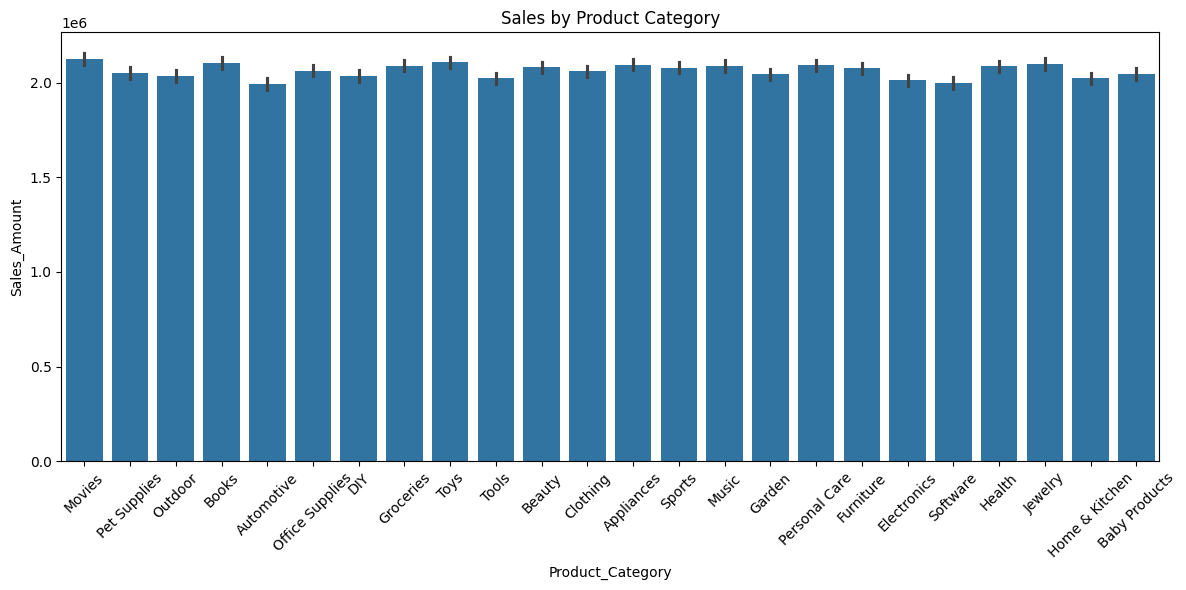

In [47]:
# Sales by Product Category
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Product_Category', y='Sales_Amount', estimator='sum')
plt.title('Sales by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets/sales_by_product_category.png")

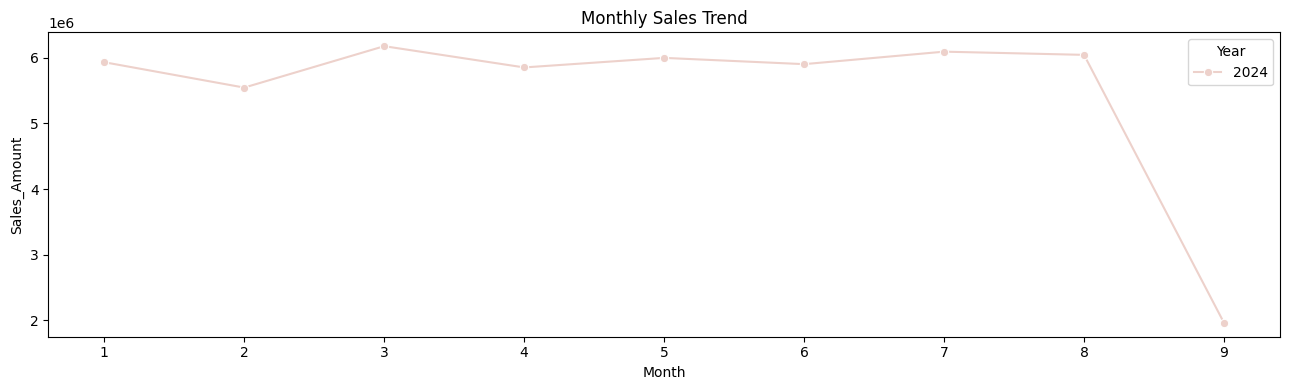

In [48]:
# Monthly Sales Trend
monthly_sales = df.groupby(['Year','Month'])['Sales_Amount'].sum().reset_index()
plt.figure(figsize=(13,4))
sns.lineplot(data=monthly_sales, x='Month', y='Sales_Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.savefig("assets/monthly_sales_trend.png")

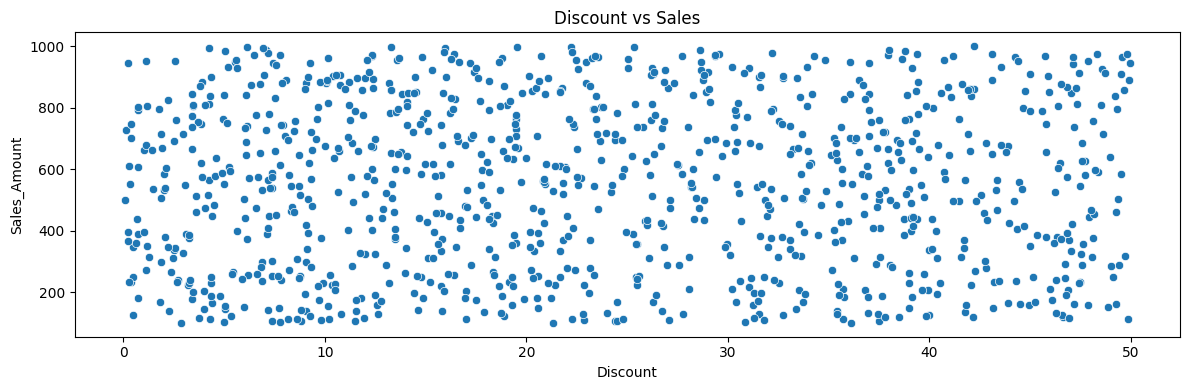

In [49]:
# Discount Impact on Sales
plt.figure(figsize=(12,4))
sns.scatterplot(data=df.sample(1000), x='Discount', y='Sales_Amount')
plt.title('Discount vs Sales')
plt.tight_layout()  

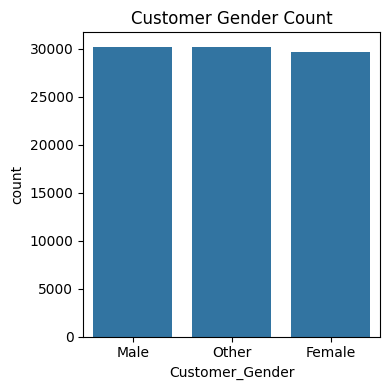

In [50]:
# Customer Gender Distribution
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Customer_Gender')
plt.title('Customer Gender Count')
plt.tight_layout()

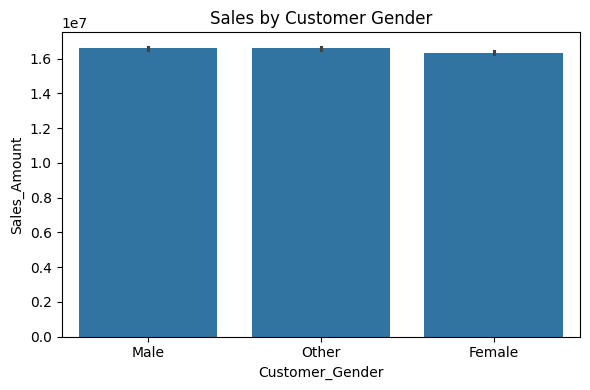

In [51]:
# Sales by Customer gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Customer_Gender', y='Sales_Amount', estimator='sum')
plt.title('Sales by Customer Gender')
plt.tight_layout()
plt.savefig("assets/sales_by_customer_gender.png")

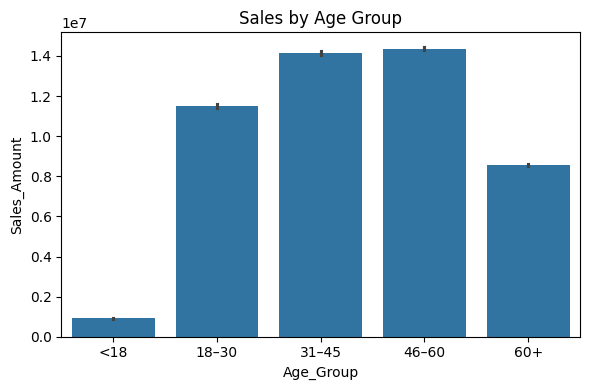

In [52]:
# sales by age group
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[0,18,30,45,60,100], labels=['<18','18–30','31–45','46–60','60+'])

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Age_Group', y='Sales_Amount', estimator='sum', order=['<18','18–30','31–45','46–60','60+'])
plt.title('Sales by Age Group')
plt.tight_layout()
plt.savefig("assets/sales_by_age_group.png")

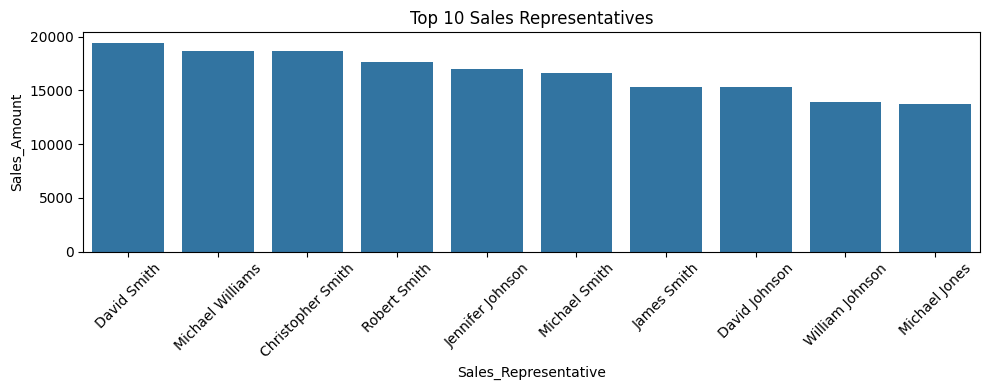

In [53]:
#  Top 10 Sales Representative
top_reps = df.groupby('Sales_Representative')['Sales_Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(data=top_reps, x='Sales_Representative', y='Sales_Amount')
plt.title('Top 10 Sales Representatives')
plt.xticks(rotation=45)
plt.tight_layout()


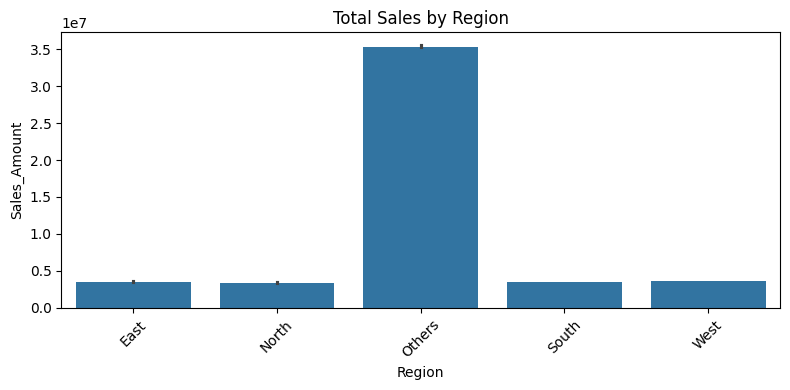

In [57]:
# sales by region
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Region', y='Sales_Amount', estimator='sum')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets/sales_by_region.png")

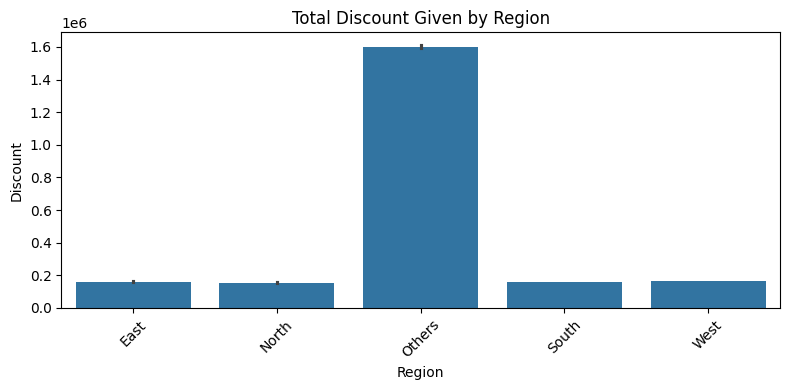

In [56]:
# discount by region
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Region', y='Discount', estimator='sum')
plt.title('Total Discount Given by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets/discount_by_region.png")

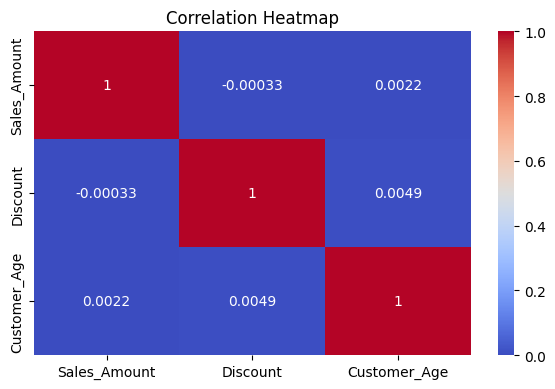

In [54]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales_Amount', 'Discount', 'Customer_Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("assets/correlation_heatmap.png")

In [58]:
df.to_csv("cleaned_retail_sales_data.csv", index=False)